## SMS-SPAM-DETECTION
### This project aims to classify SMS messages as 'spam' or 'ham' (not spam) using various machine learning techniques.



In [6]:
import numpy as np
import pandas as pd

In [7]:
#it was showing some error that UTF-8 cant decode bytes 606-607,so different encoding was needed
df=pd.read_csv('spam.csv',encoding='cp1252')

In [8]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4549,ham,\Hey! do u fancy meetin me at 4 at cha åÐ hav ...,NaN,NaN,NaN
2699,ham,Oh baby of the house. How come you dont have a...,NaN,NaN,NaN
3930,ham,Nooooooo I'm gonna be bored to death all day. ...,NaN,NaN,NaN
3998,ham,K...k...when will you give treat?,NaN,NaN,NaN
865,spam,Congratulations ur awarded either a yrs supply...,NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

## Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [12]:
df.sample(5)

,v1,v2
4743,ham,"\Thinking of u ;) x\"""""
2699,ham,Oh baby of the house. How come you dont have a...
3068,ham,Ay wana meet on sat?Ì_ wkg on sat?
4226,ham,Buy one egg for me da..please:)
2935,ham,And stop wondering \wow is she ever going to s...


In [13]:
#Renaming the columns 
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [14]:
df.sample(3)

,target,text
3894,ham,Yes. Last practice
2390,ham,First has she gained more than &lt;#&gt; kg s...
2349,ham,Yar else i'll thk of all sorts of funny things.


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df.target)

In [17]:
df.sample(3)

,target,text
2804,0,I think it's all still in my car
849,1,Today's Offer! Claim ur å£150 worth of discoun...
4397,0,Can you tell Shola to please go to college of ...


In [18]:
#Checking for Missing Values
df.isnull().sum()

target    0
text      0
dtype: int64

In [19]:
#Check for duplicate values
df.duplicated().sum()

np.int64(403)

In [20]:
df=df.drop_duplicates(keep='first')

In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
df.shape

(5169, 2)

## EDA

In [23]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

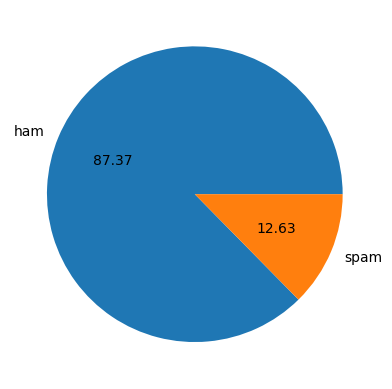

In [26]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [27]:
# Data is Imbalanced

In [28]:
import nltk

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Creating new features like:
### - Number of characters in each message
### - Number of words in each message
### - Number of sentences in each message


In [30]:
#Number of characters
df['num_characters']=df.text.apply(len)

In [31]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
#Number of words
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [33]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
df['num_sentences']=df.text.apply(lambda x: len(nltk.sent_tokenize(x)))

In [35]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
#describing the ham texts
df[df.target==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
#describing the spam texts
df[df.target==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [39]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

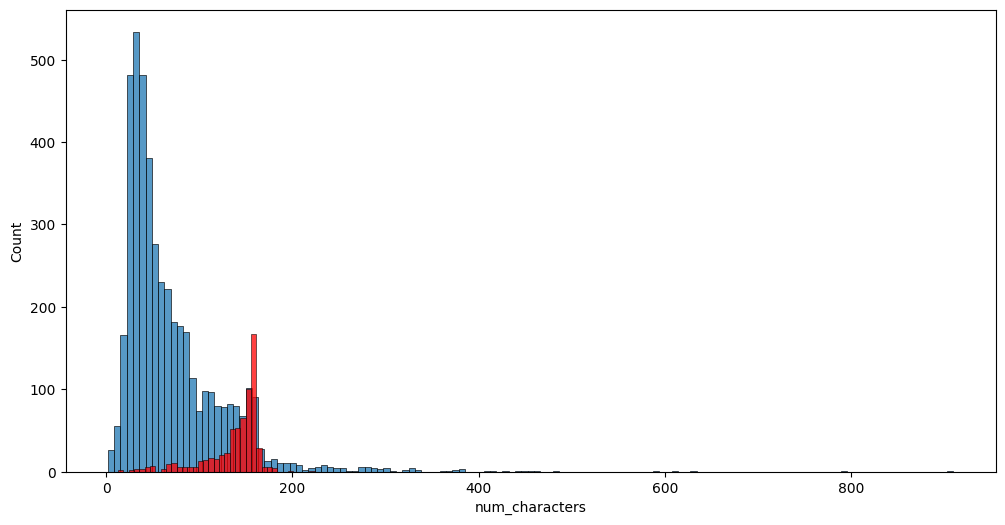

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df.target==0]['num_characters'])
sns.histplot(df[df.target==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

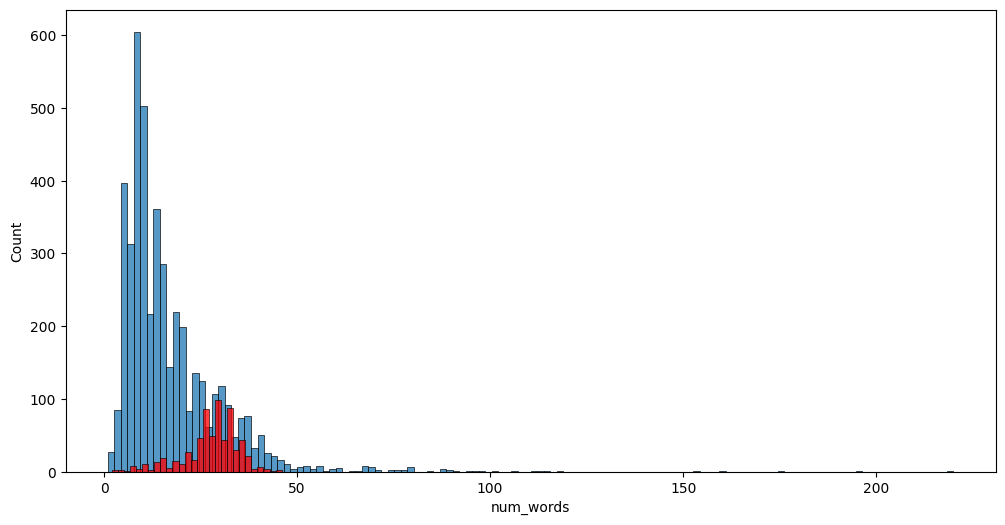

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df[df.target==0]['num_words'])
sns.histplot(df[df.target==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

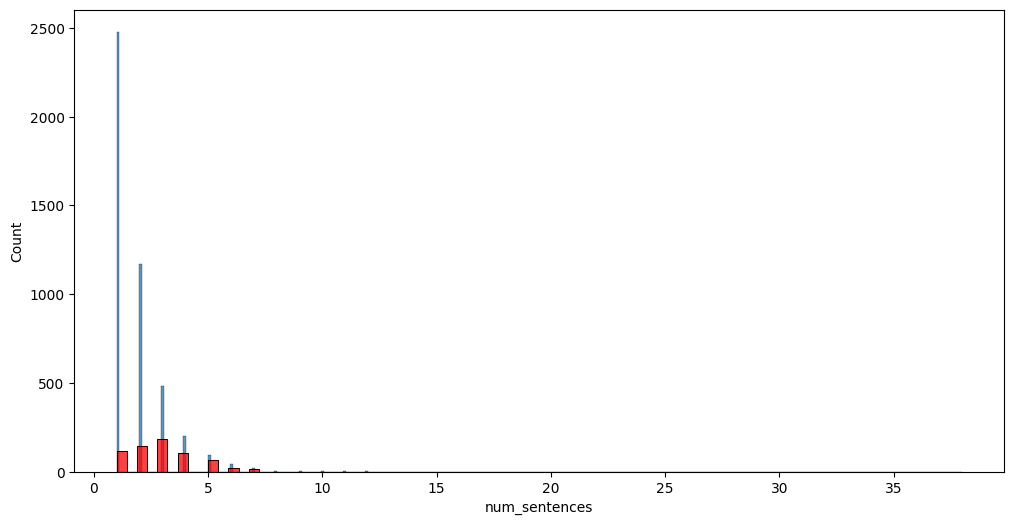

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(df[df.target==0]['num_sentences'])
sns.histplot(df[df.target==1]['num_sentences'],color='red')

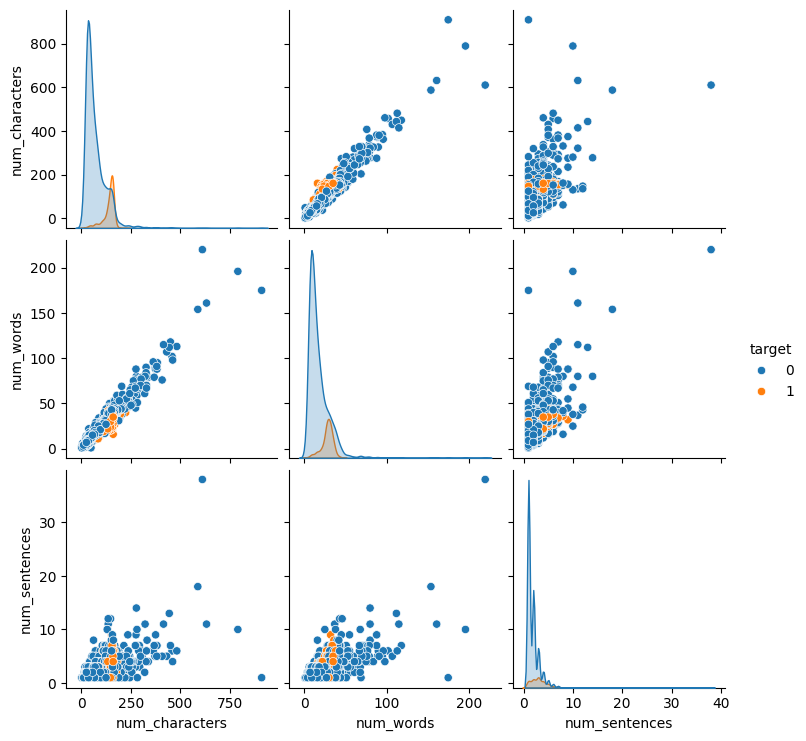

In [43]:
sns.pairplot(df,hue='target')

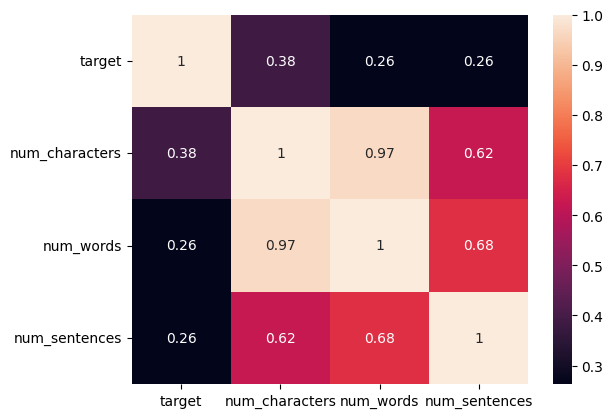

In [44]:
numeric_df = df.select_dtypes(include=[float, int])  
sns.heatmap(numeric_df.corr(), annot=True) 
plt.show()

# Data Processing 

### Lower case
### Tokenization
### Removing special characters
### Removing stop words and punctuation
### Stemming

In [70]:

import string 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [99]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [100]:
df['transformed_text']=df['text'].apply(transform_text)

In [101]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [135]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='red')
wc_=WordCloud(width=500,height=500,min_font_size=10,background_color='green')

In [136]:
spam_wc=wc.generate(df[df.target==1]['transformed_text'].str.cat(sep=" "))

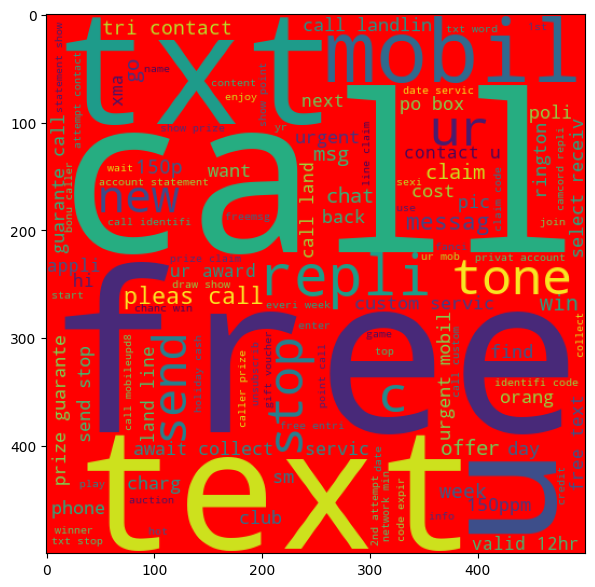

In [181]:
plt.figure(figsize=(15,7))
plt.imshow(spam_wc)

In [138]:
ham_wc=wc_.generate(df[df.target==0]['transformed_text'].str.cat(sep=" "))

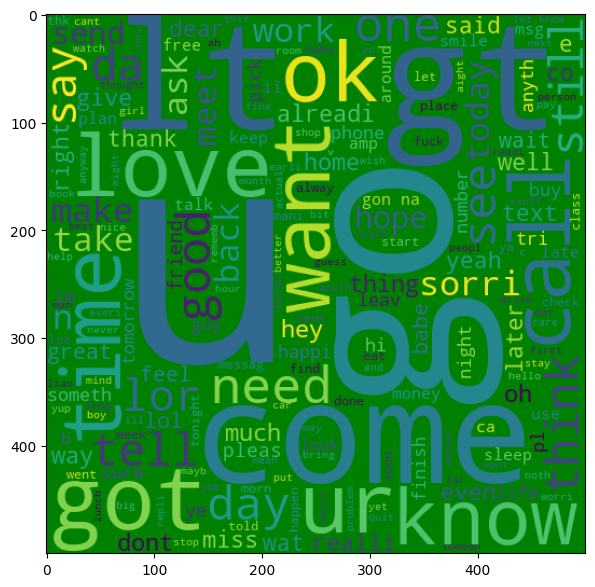

In [183]:
plt.figure(figsize=(15,7))
plt.imshow(ham_wc)

In [118]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [121]:
spam_corpus=[]
for msg in df[df.target==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [122]:
len(spam_corpus)

9939

## Model Building



In [140]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [142]:
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [143]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [144]:
y=df.target

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [163]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import classification_report

In [164]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [165]:
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print(gnb.score(X_test,y_test))
print(classification_report(y_test,y_pred))

0.8800773694390716
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       896
           1       0.53      0.86      0.66       138

    accuracy                           0.88      1034
   macro avg       0.75      0.87      0.79      1034
weighted avg       0.92      0.88      0.89      1034



In [166]:
#Here is GaussianNB the accuracy is very less and so is the precision of spam 

In [167]:
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)
print(mnb.score(X_test,y_test))
print(classification_report(y_test,y_pred1))

0.9642166344294004
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       896
           1       0.83      0.91      0.87       138

    accuracy                           0.96      1034
   macro avg       0.91      0.94      0.93      1034
weighted avg       0.97      0.96      0.96      1034



In [168]:
# Here the accuracy of model is decent but precision of spam class is still not good

In [169]:
bnb.fit(X_train,y_train)
y_pred2=bnb.predict(X_test)
print(bnb.score(X_test,y_test))
print(classification_report(y_test,y_pred2))

0.9700193423597679
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.97      0.80      0.88       138

    accuracy                           0.97      1034
   macro avg       0.97      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [170]:
#Here bothe the accuracy and precision of the model are decent

In [171]:
X1=tfidf.fit_transform(df.transformed_text).toarray()

In [172]:
X1_train,X1_test,y_train,y_test=train_test_split(X1,y,test_size=0.2)

In [173]:
gnb.fit(X1_train,y_train)
y_pred4=gnb.predict(X1_test)
print(gnb.score(X1_test,y_test))
print(classification_report(y_test,y_pred4))

0.8578336557059961
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       892
           1       0.49      0.89      0.63       142

    accuracy                           0.86      1034
   macro avg       0.73      0.87      0.77      1034
weighted avg       0.91      0.86      0.87      1034



In [174]:
#Using tfidf does not make a different in gnb

In [177]:
mnb.fit(X1_train,y_train)
y_pred5=mnb.predict(X1_test)
print(mnb.score(X1_test,y_test))
print(classification_report(y_test,y_pred5))

0.97678916827853
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       892
           1       1.00      0.83      0.91       142

    accuracy                           0.98      1034
   macro avg       0.99      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [178]:
#Here Now we got the best precision score which is 100% and accuracy is also good,so far it is the best model

In [179]:
bnb.fit(X1_train,y_train)
y_pred6=bnb.predict(X1_test)
print(bnb.score(X1_test,y_test))
print(classification_report(y_test,y_pred6))

0.988394584139265
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       1.00      0.92      0.96       142

    accuracy                           0.99      1034
   macro avg       0.99      0.96      0.97      1034
weighted avg       0.99      0.99      0.99      1034



In [180]:
#In bnb we got even better accuracy and precision is still 100%

## We choose BernoulliNB model which was executed using Tf-Idf Vectorizer,because it has the highest accuracy and more importantly 100% precision which means there are no false positives when the model predicts False.